In [1]:
import numpy as np
import torch
import scipy.sparse as sp
import pandas as pd
import math
import random
from sklearn.preprocessing import minmax_scale, scale
import matplotlib.pyplot as plt
from sklearn import metrics
from itertools import cycle

/home/21031211508/anaconda3/envs/torch_zhu/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
PR_plot = np.load('./PR_plot.npy', allow_pickle=True).item()
PR_plot.keys()

dict_keys(['sign2', 'sign1', 'greet', 'trustsgcn', 'gatmda'])

In [10]:
suf = 'sign1'
folds = np.load('../peryton_'+suf+'_folds.npy', allow_pickle=True).item()

In [16]:
suf = 'gatmda'
folds = np.load('../'+suf+'_embedding_peryton_folds.npy', allow_pickle=True).item()

In [17]:
y_real = []
y_proba = []
for name, yp in zip(folds.keys(), folds.values()):
    y_real.append(yp[0].ravel())
    y_proba.append(yp[1].ravel())
y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, _ = metrics.precision_recall_curve(y_real, y_proba)
aupr = metrics.auc(recall, precision)
PR_plot[suf] = (recall, precision, aupr)

In [25]:
PR_plot.keys()

dict_keys(['sign2', 'sign1', 'greet', 'trustsgcn', 'gatmda', 'slgnn'])

In [19]:
np.save('./PR_plot.npy', PR_plot)

# plot


In [20]:
data = np.load('./PR_plot.npy', allow_pickle=True).item()

In [21]:
names = list(data.keys())
names

['sign2', 'sign1', 'greet', 'trustsgcn', 'gatmda', 'slgnn']

In [22]:
names_1 = ['sign2', 'sign1', 'greet', 'trustsgcn', 'gatmda', 'slgnn']

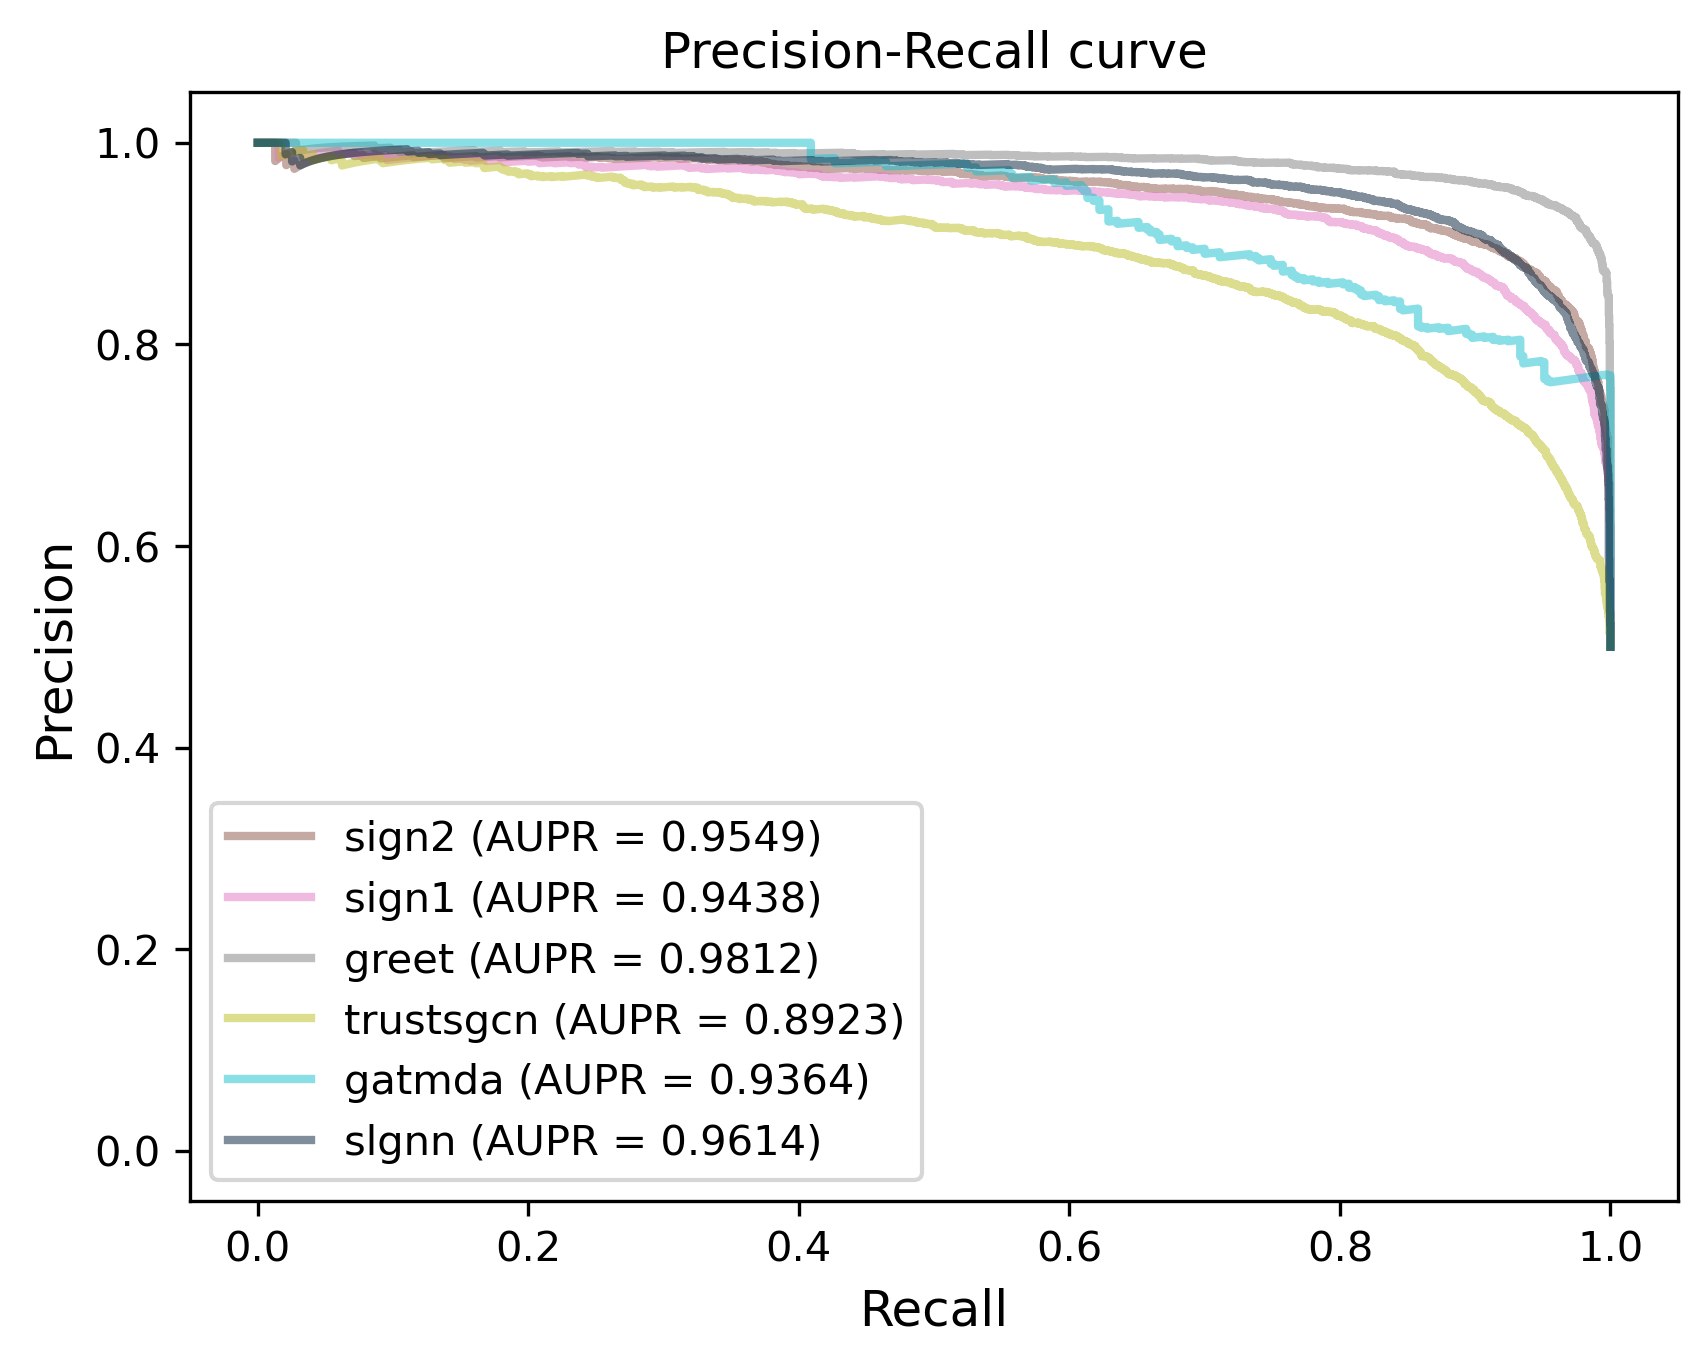

In [24]:
c = cycle([ # 使用颜色编码定义颜色
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#001e36'])
fig, ax = plt.subplots(dpi=300) # 指定大小分辨率等，相当于画纸
for i, (item, color) in enumerate(zip(names, c)):
    ax.plot(data[item][0], data[item][1], color=color, lw=2, alpha=.5,
            label=str(names_1[i]) + ' (AUPR = %0.4f)' % data[item][2])
    
ax.set_xlabel('Recall', size=12)
ax.set_ylabel('Precision', size=12)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
    title="Precision-Recall curve")
ax.legend(loc="lower left")
plt.savefig('./PR.tiff', dpi=300)